<a href="https://colab.research.google.com/github/ajaythakur3369/TED-Talk-Views-Prediction/blob/main/TED_Talk_Views_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** -

$\color{red}{\text{TED Talk Views Prediction}}$

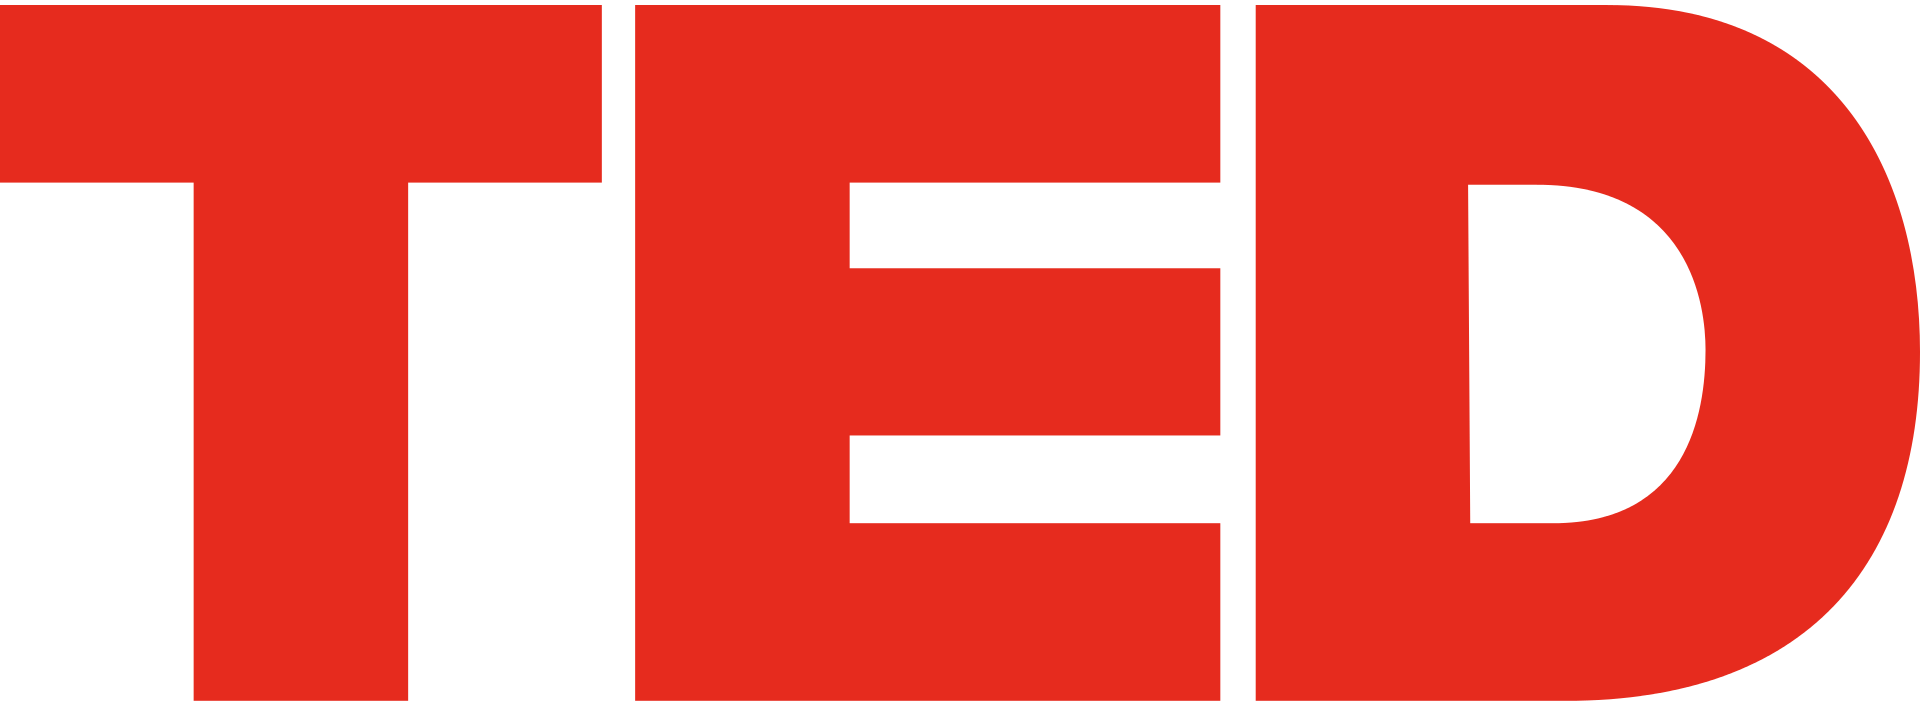

##### **Project Type**    - TED Talk Views Prediction (Regression)
##### **Contribution**    - Individual
##### **Team Member 1** -  $\color{green}{\text{Ajay Thakur (2016kuec2026@iiitkota.ac.in)}}$



# **Project Summary -**

#### TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

#### A TED talk is a presentation given at a TED (Technology, Entertainment, Design) conference or a TEDx event. TED talks are typically given by experts in various fields, such as science, technology, business, and the arts, and are intended to share ideas and inspire the audience.

#### A project summary on TED talk would be a brief overview of the main points and takeaways from a particular TED talk. The summary would cover the speaker's main argument or message, as well as any key insights or examples they shared. It could also include the speaker's background and qualifications, as well as any relevant research or data they cited.

###**Dataset Information -**

* Number of instances are 4,005

* Number of attributes are 19

###**Features Information -**

* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###**Target Variable -**

* **views**: Count of views



# **GitHub Link -**

https://github.com/ajaythakur3369/TED-Talk-Views-Prediction

# **Problem Statement -**


**Write Problem Statement Here.**

* The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **General Guidelines** -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import f_regression # Use in feature selection, feature and the target feature using the F-distribution
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
# Access the Drive from Colab, for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/folders/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset first look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset rows & columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset duplicate value count
duplicate_count = df.duplicated().sum()
duplicate_count

0

#### Missing/Null Values

In [ ]:
# Missing/null values count
null_values = df.isnull().sum().reset_index()
null_values

,index,0
0,talk_id,0
1,title,0
2,speaker_1,0
3,all_speakers,4
4,occupations,522
5,about_speakers,503
6,views,0
7,recorded_date,1
8,published_date,0
9,event,0


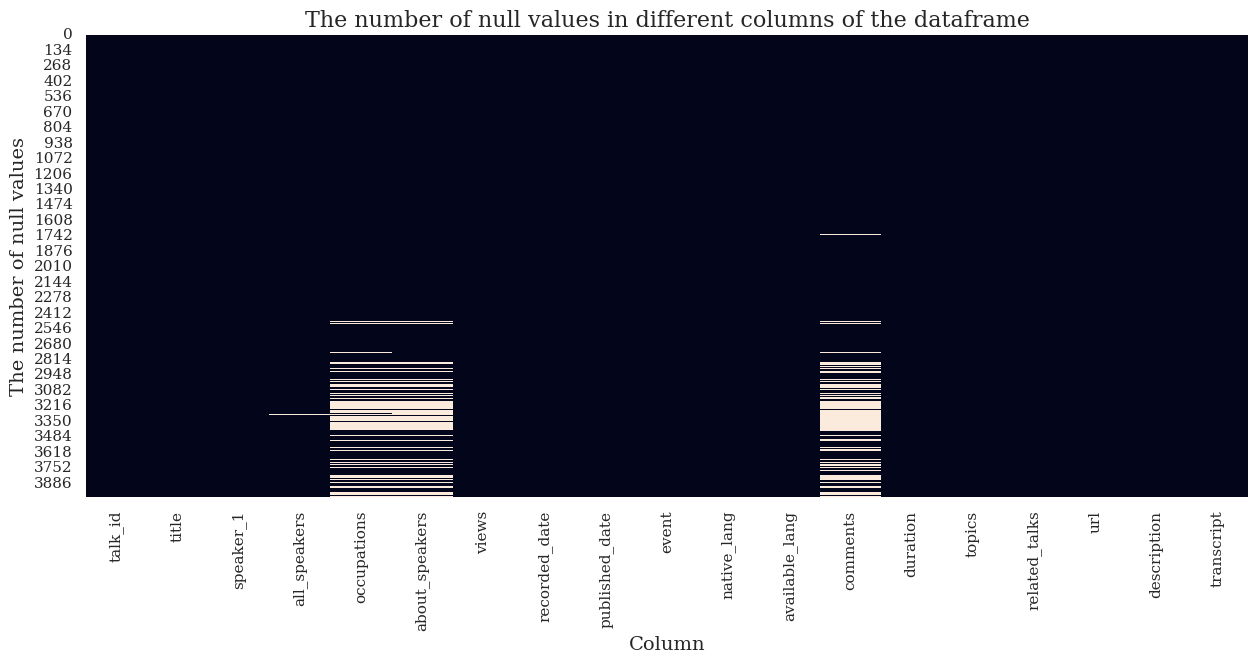

In [ ]:
# Graph representation
plt.rcParams['figure.figsize'] = (15, 6)
ax = sns.heatmap(df.isnull(), cbar = False)
plt.xlabel("Column", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("The number of null values", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of null values in different columns of the dataframe', fontname = 'serif', fontsize = 16)
plt.show()

### What did you know about your dataset?

This dataset have rows 4005 and 19 columns with no duplicated values.It has major missing in three columns comments,occupations and about_speakers.Some missing values are in all_speakers and recorded_date.Dataset have 3 int64 data_type columns ,1 float64 column and 15 object data type columns.It has two date columns also recored date and published which will be useful for our EDA process.


## **2. Understanding Your Variables**

In [ ]:
# Display the name of the columns in the dataset
print(df.columns) # It returns the label of each column in the dataFrame

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')


In [ ]:
# Dataset describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description

As mentioned earlier dataset has 4 int columns. So, we can see the max and min values of columns with 25, 50, 75 percentile.

We can observe minimum values of views and comments are 0 it means nobody viewed and commented in some videos.

We can see the counts of all the values.

### Check Unique Values for each variable

In [ ]:
# Check unique values for each variable
unique_values = df.nunique().reset_index()
unique_values

,index,0
0,talk_id,4005
1,title,4005
2,speaker_1,3274
3,all_speakers,3306
4,occupations,2049
5,about_speakers,2977
6,views,3996
7,recorded_date,1334
8,published_date,2962
9,event,459


## 3. **Data Wrangling**

### Data Wrangling Code

In [ ]:
# Write the code to make our dataset analysis ready, remove null values from occupations, all_speakers and recorded date
df['occupations'].fillna(str({0: ['Other']}), inplace = True)
df['all_speakers'].fillna('', inplace = True)
df['recorded_date'].fillna('', inplace = True)

In [ ]:
# Drop about_speakers column due to useless data
df['about_speakers'][0]

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

In [ ]:
# Drop the columns talk_id and about_speakers
df.drop(['talk_id','about_speakers'], axis = 1, inplace = True)

# Replace the comments with avg of comments
df['comments'].fillna(df['comments'].mean(), inplace = True)

In [ ]:
# Again check the null values
df.isnull().sum().reset_index()

,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


In [ ]:
# Change the format of published_date
df['published_date'] = pd.to_datetime(df['published_date'], format = '%Y/%m/%d')

# Split the published_date in other columns
df['release_day'] = df['published_date'].dt.weekday
df['release_month'] = df['published_date'].dt.month
df['release_year'] = df['published_date'].dt.year

In [ ]:
# See average views in each year
mean_views = df.groupby('release_year')['views'].mean().nlargest(15).reset_index()
mean_views

,release_year,views
0,2006,4.937003e+06
1,2013,3.012435e+06
2,2015,2.806775e+06
3,2016,2.734725e+06
4,2014,2.423564e+06
5,2012,2.196281e+06
6,2010,2.188767e+06
7,2017,2.160378e+06
8,2009,2.071610e+06
9,2019,1.939608e+06


In [ ]:
# Maximum views year_wise
total_views_yearly = df.groupby('release_year')['views'].sum().nlargest(15).reset_index()
total_views_yearly

,release_year,views
0,2019,1361604924
1,2018,871101863
2,2013,729009369
3,2017,680519097
4,2012,665473046
5,2016,661803437
6,2015,617490537
7,2014,581655293
8,2010,503416439
9,2011,492776405


In [ ]:
# Number of videos release each year
release_counts_yearly = df['release_year'].value_counts().nlargest(15).reset_index()
release_counts_yearly

,index,release_year
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


In [ ]:
# Create categorical columns for more insights
weekday = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['release_day'] = df['release_day'].map(weekday)

### What all manipulations have you done and insights you found?

Inference -

1. First of all we removed all the null values.

2. Drop all the unwanted columns.

3. Explored the published date columns beacuse it has so much insights.

4. In 2006 have most average views following 2013 and 2015.Year 2020 has the least average views.

5. In the year of 2019 has the max views in ted talk history after that 2018 and 2013. Year 2020 is the least beacuse we don't have enough data of 2020.

6. In the year of 2019 has maximum release videos following 2018 and 2017.
Year 2006 has the least release, that's why it has maximum average.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1

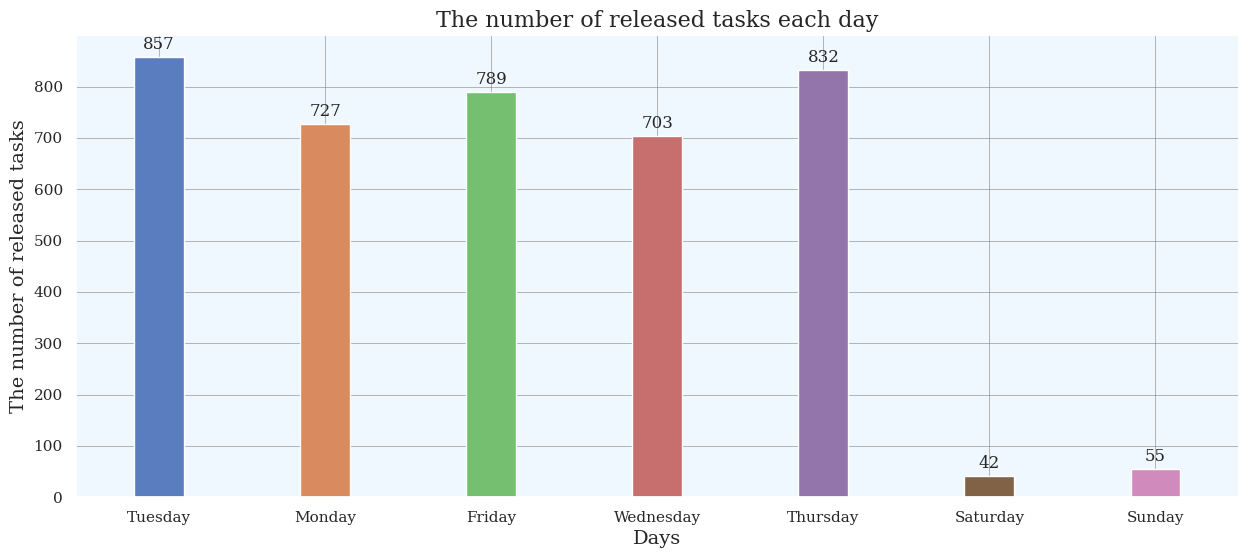

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_day', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Days", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of released tasks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of released tasks each day', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked countplot from seaborn library beacuse it has ability to the show count of all the data in a bar chart.




##### 2. What is/are the insight(s) found from the chart?

Inference -

1. I found count of released videos in week days.

2. Most videos released on Tuesday,Thursday and Friday.

3. Saturday and Sunday has the least count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should increase the release count on Saturday and Sunday also. There is no negative growth in business.

#### Chart - 2

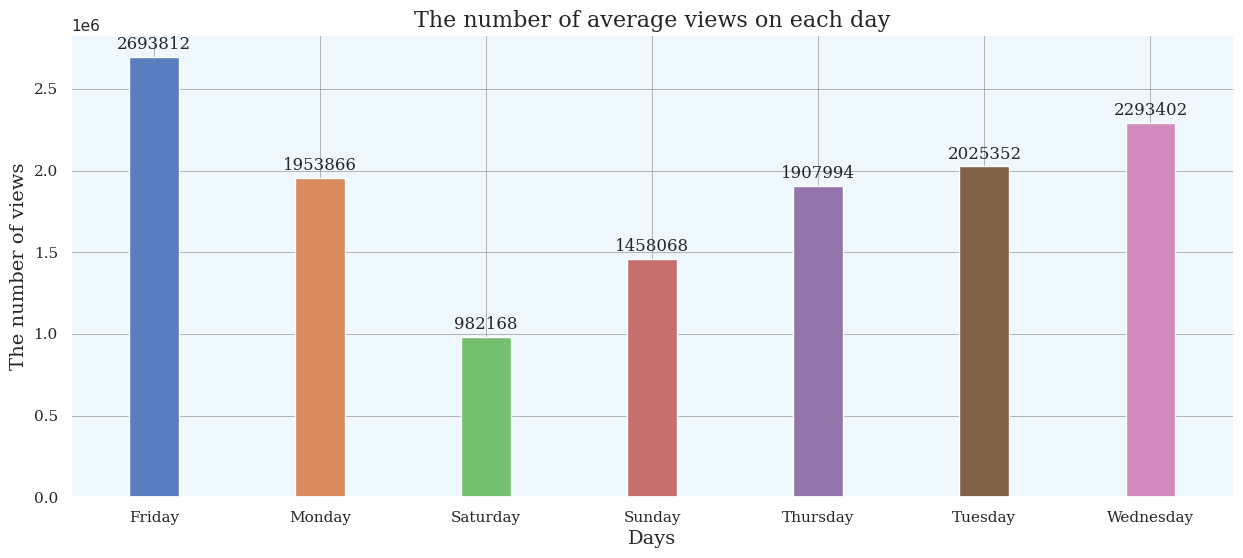

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
avg_views = df.groupby('release_day')['views'].mean().reset_index()
ax = sns.barplot(data = avg_views, x = 'release_day', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Days", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of average views on each day', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn library beacause it can easily show the average views in each day.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. Friday has the most number of average views due to weekend.

2. Tuesday has maximum release count still it has on 3rd position after Wednesday.

3. Saturday & Sunday have least release therefore it has least average views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should increase the release count on weekend so people can watch it on weekend also. As compared to number of counts and avg views, people love to watch videos on weekends.

In [ ]:
# Create categorical columns for more insights
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['release_month'] = df['release_month'].replace(number, name)

#### Chart - 3

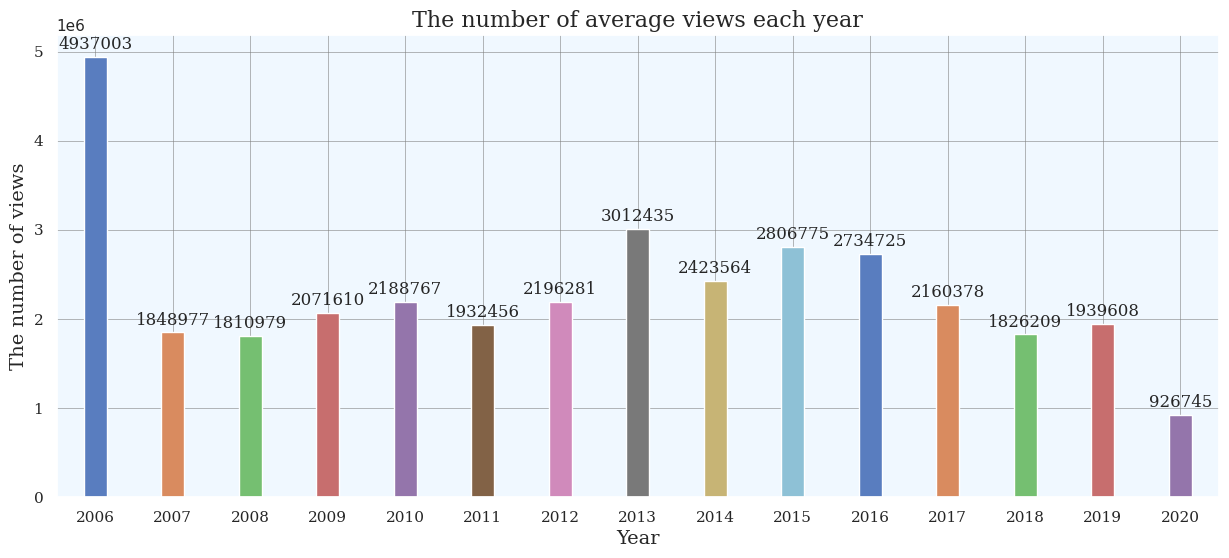

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
avg_views = df.groupby('release_year')['views'].mean().reset_index()
ax = sns.barplot(data = avg_views, x = 'release_year', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of average views each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked point plot from seaborn beacause it has the ability to show mean of a numeric variable for different levels of a categorical variable.


##### 2. What is/are the insight(s) found from the chart?

1. In 2006 have most number average views following 2013 and 2015.

2. Year 2020 has the least average views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If we talk about the business mean views are on same scale from 2007 to 2019. In 2013, we can see the little bit change. Somewhere it is going down because of number of released videos.

#### Chart - 4

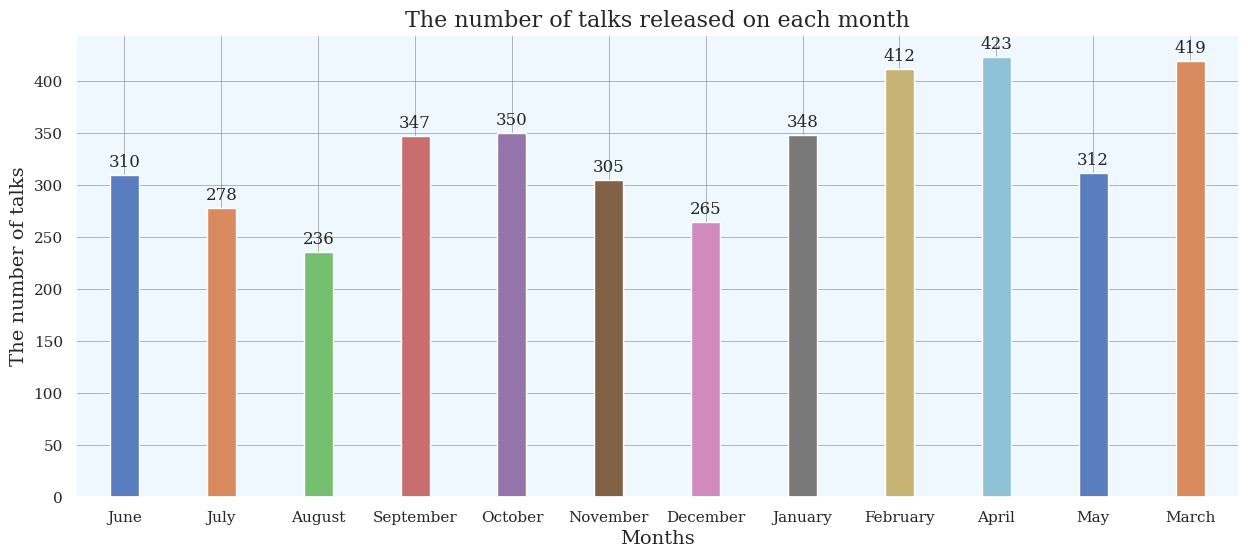

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_month', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Months", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of talks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of talks released on each month', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked countplot from seaborn library beacuse it gives us the number of talks release  in each month.

I tried to show it with horizontal bar chart.  

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. April has the most number of release count following February and March.

2. August and December has the least number of release.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should increase the release count in August and December also.

#### Chart - 5

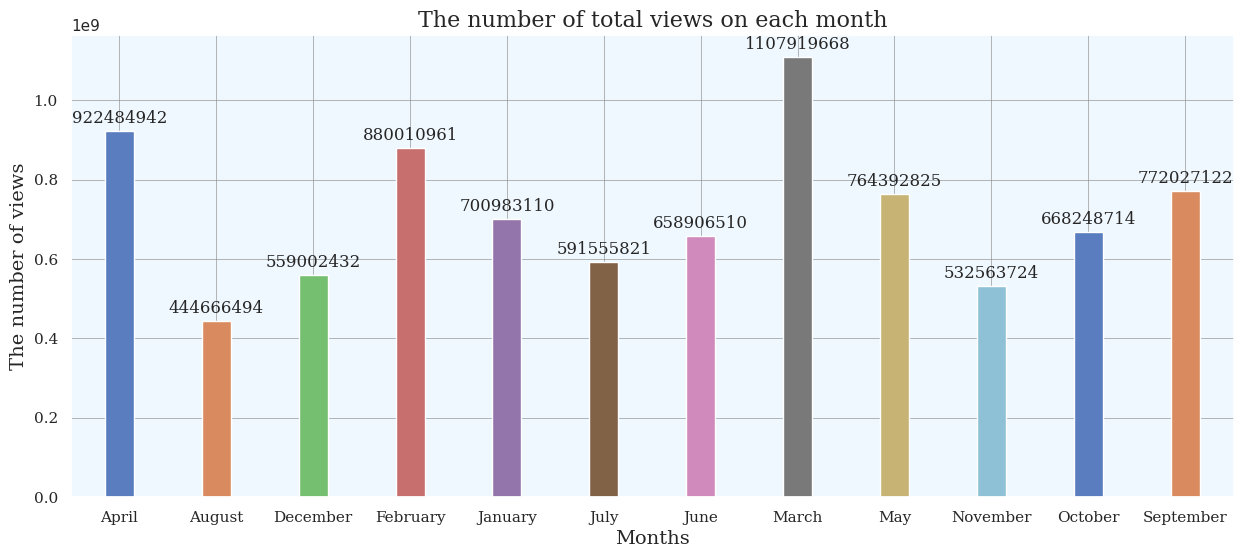

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
month_views = df.groupby('release_month')['views'].sum().reset_index()
ax = sns.barplot(data = month_views, x = 'release_month', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Months", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of total views on each month', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot for getting the total views with respect to month.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. March has the most views and it has also the large number of released talks.

2. August has the least number of released therfore it has less number of total views.

3. March has the less number of release talk still it is giving better result in total views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should do some survey about March have large numer of viewership. If they increase the number of count in each month automatically viewership will increase.

#### Chart - 6

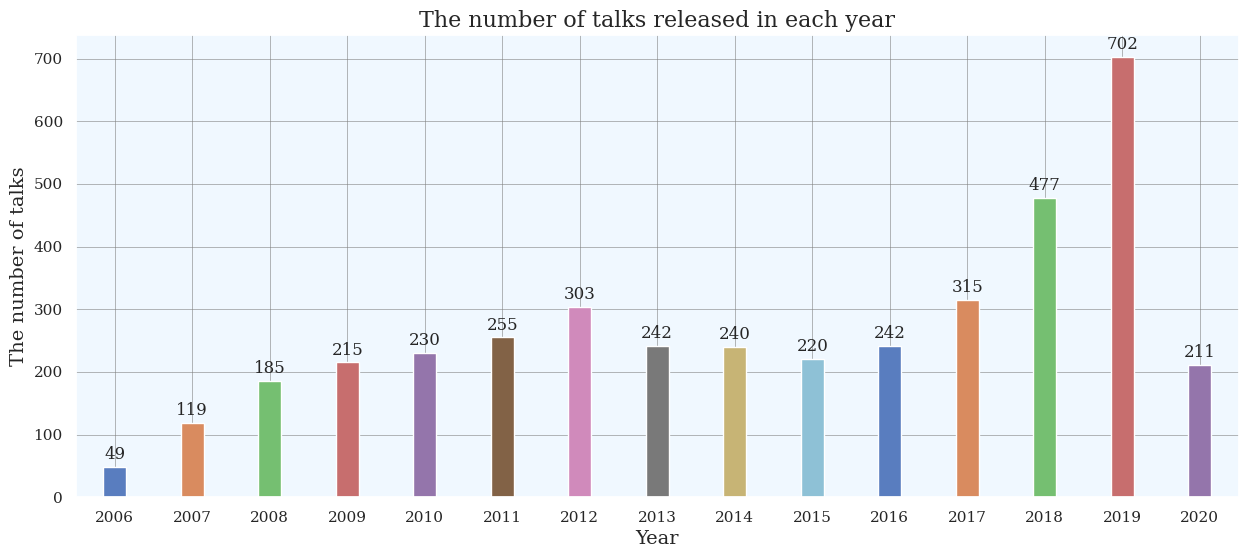

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_year', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of talks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of talks released in each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot in the seaborn library is used to create a count plot, which is a type of chart that displays the count of observations for each category of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. In the year 2019 Ted talk has maximum release videos following 2018 and 2017.

2. In 2006 it has least talks therefore 2006 has largerst mean in views.

3. Talks are rapidly increasing from 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see rapid change in 2012.

#### Chart - 7

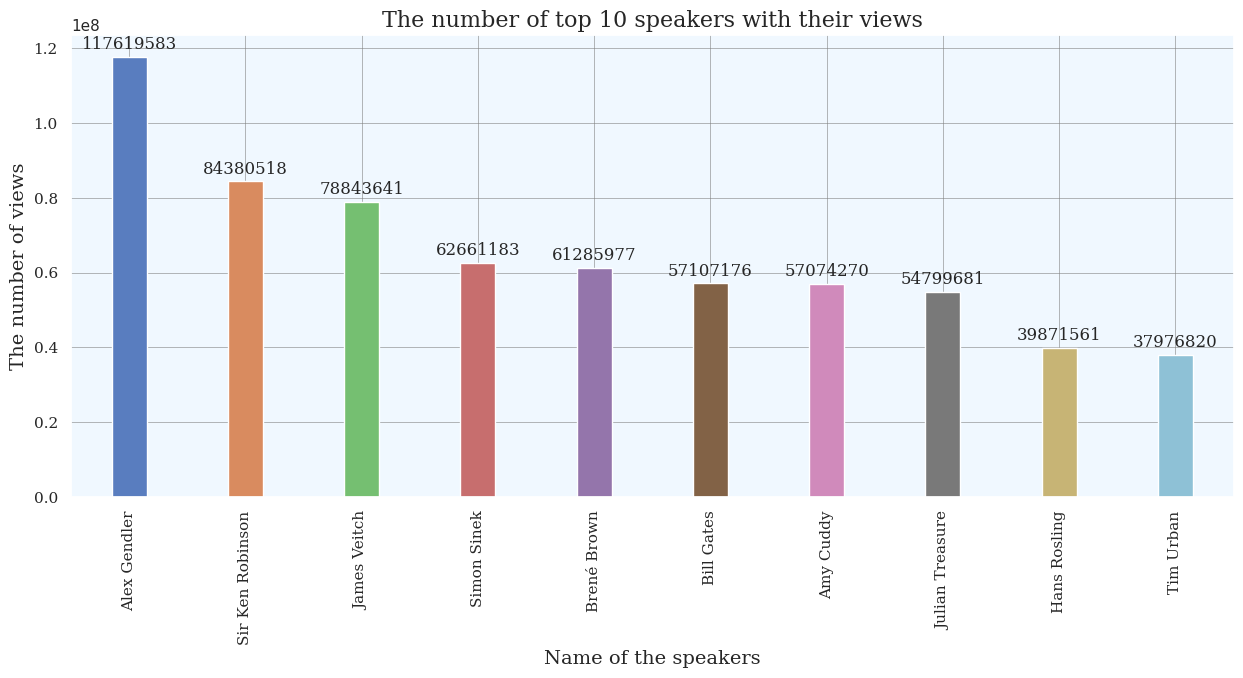

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_views = df.groupby('speaker_1')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(data = total_views, x = 'speaker_1', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the speakers", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of top 10 speakers with their views', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn because it displays the sum of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. We have lots of speaker in TED talk so i filter out top 10 speakers.

2. Alex Gendler has most views in TED talk history. We can say that he influenced a lot. Sir kin Robinson and JAmes weitch are following Alex Gendler

3. Bill gates is also in this list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should invite other speaker also again and again who have larger number of viewership.

After Alex Gendler other speaker don't have maximum released still they have larger viewrship. So, TED talk should call them again, most popular speaker.

#### Chart - 8

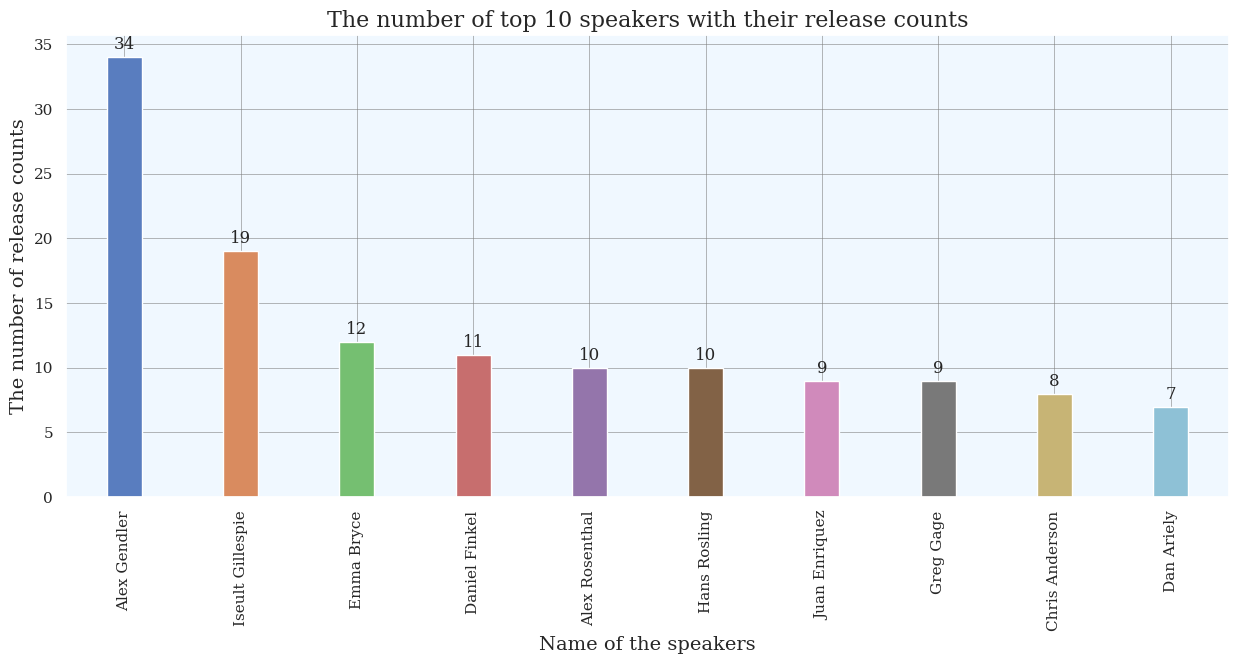

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
speaker_count = df['speaker_1'].value_counts().reset_index().head(10)
ax = sns.barplot(data = speaker_count, x = 'index', y = 'speaker_1', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the speakers", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of release counts', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of top 10 speakers with their release counts', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn because it displays the count of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. Alex Gendler has maximum release in TED talk history therefore he has max views as we explored earlier.

2. Iseult Gillespie and Emma Bryce are runner up in max release count list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should release the talk of other speakers also. As we can see the major difference between first and second person in release counts with repect to speakers.

#### Chart - 9

**WordCloud -** A word cloud is a visual representation of the most frequent words in a text, where the size of each word is proportional to its frequency. In Python, you can create a word cloud using the wordcloud library.

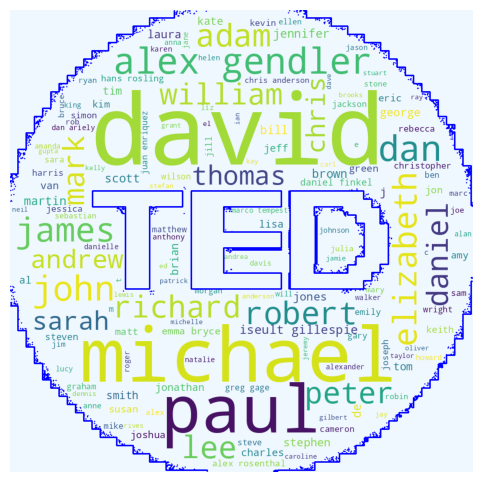

In [ ]:
# Visualization representation
corpus = list(df['speaker_1'].values)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://i2.wp.com/norfolkpl.org/wp-content/uploads/2019/01/ted-talk-logo.jpg?ssl=1")
image_bytes = io.BytesIO(response.content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "aliceblue", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS), contour_width = 3, contour_color = 'blue')
    cloud.generate(string)

# cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud = create_word_cloud(dataset)
plt.figure(figsize = [15, 6])

# Image show
plt.imshow(wordcloud)

# To off the axis of x and y
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is a visual representation of the most frequent words in a text, where the size of each word is proportional to its frequency. In Python, you can create a word cloud using the wordcloud library.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. We can easily see the most frequent name in speaker list with this amazing visuals.

2. Micheal, David and Paul are most frequent words.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In wordcloud we can easily see the frequent word without using any funtion.

#### Chart - 10

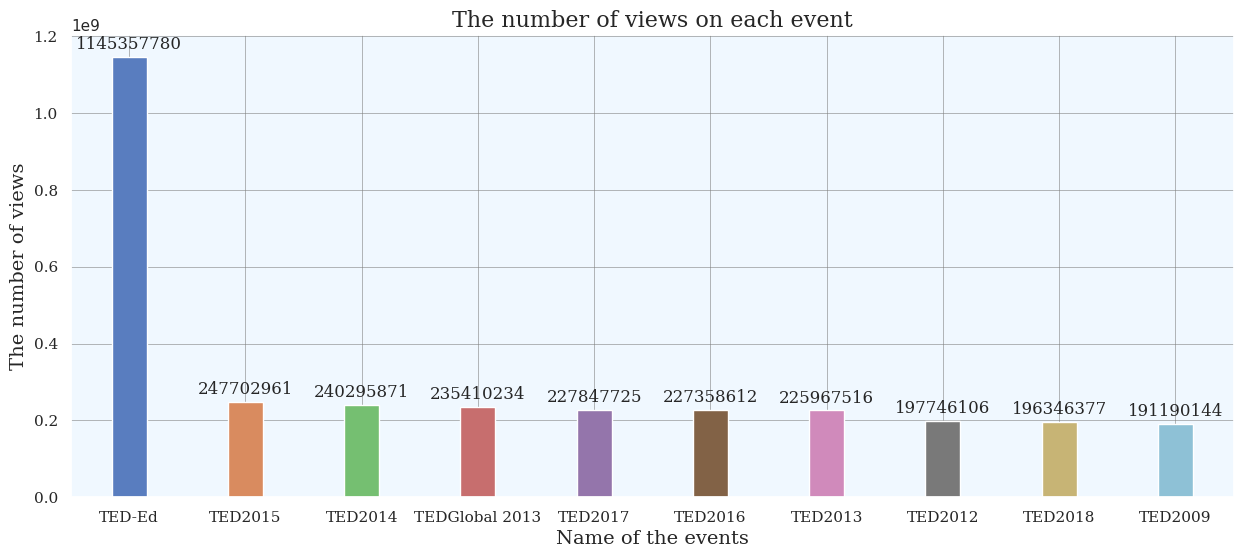

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
event_views = df.groupby('event')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(data = event_views, x = 'event', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the events", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of views on each event', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn because it displays the count of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. TED-Ed has maximum views following TED2015 and TED2014.

2. In Top 10 list only TED-Ed has the very large number than we can see a rapid change in views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In TED talk only TED_Ed has the maximum views so, TED talk should organise other events also.

#### Chart - 11

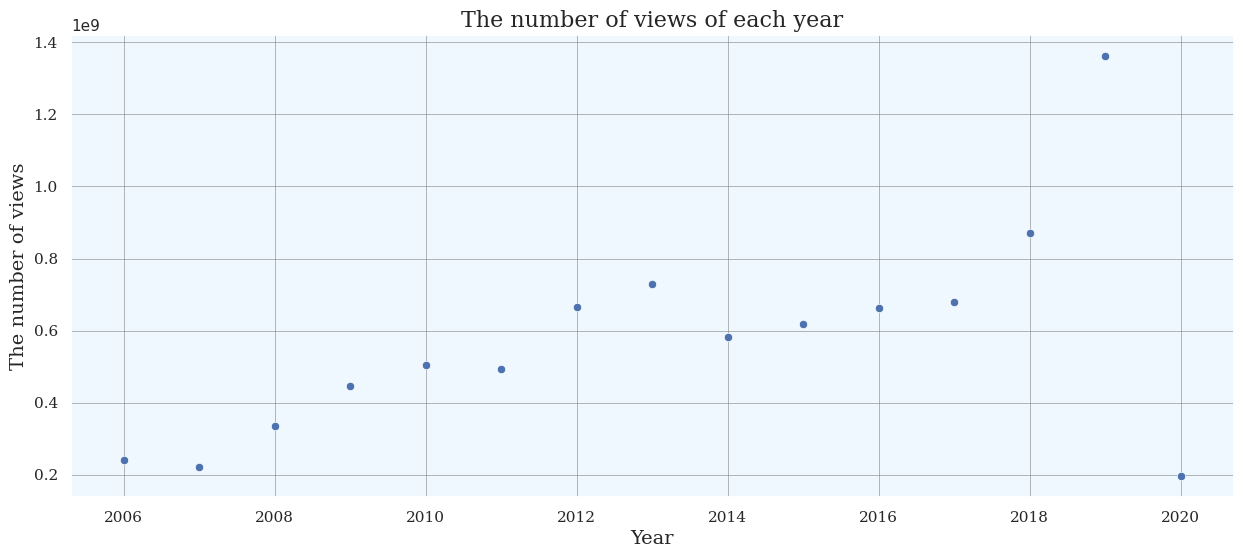

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_viewership = df.groupby('release_year')['views'].sum().reset_index()
ax = sns.scatterplot(data = total_viewership, x = "release_year", y = "views")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of views of each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot tells us how two variable related to each other therfore I used this.


##### 2. What is/are the insight(s) found from the chart?

Inference -

1. In scatter plot we can see that as soon as year increasing the sum of views increasing.

2. Year 2019 has the maximum views and 2006 has less number of views due to less number of release.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk viewership increasing which will be helpful for TED talk business.

They should take the same steps which they took in the the year of 2019.

#### Chart - 12

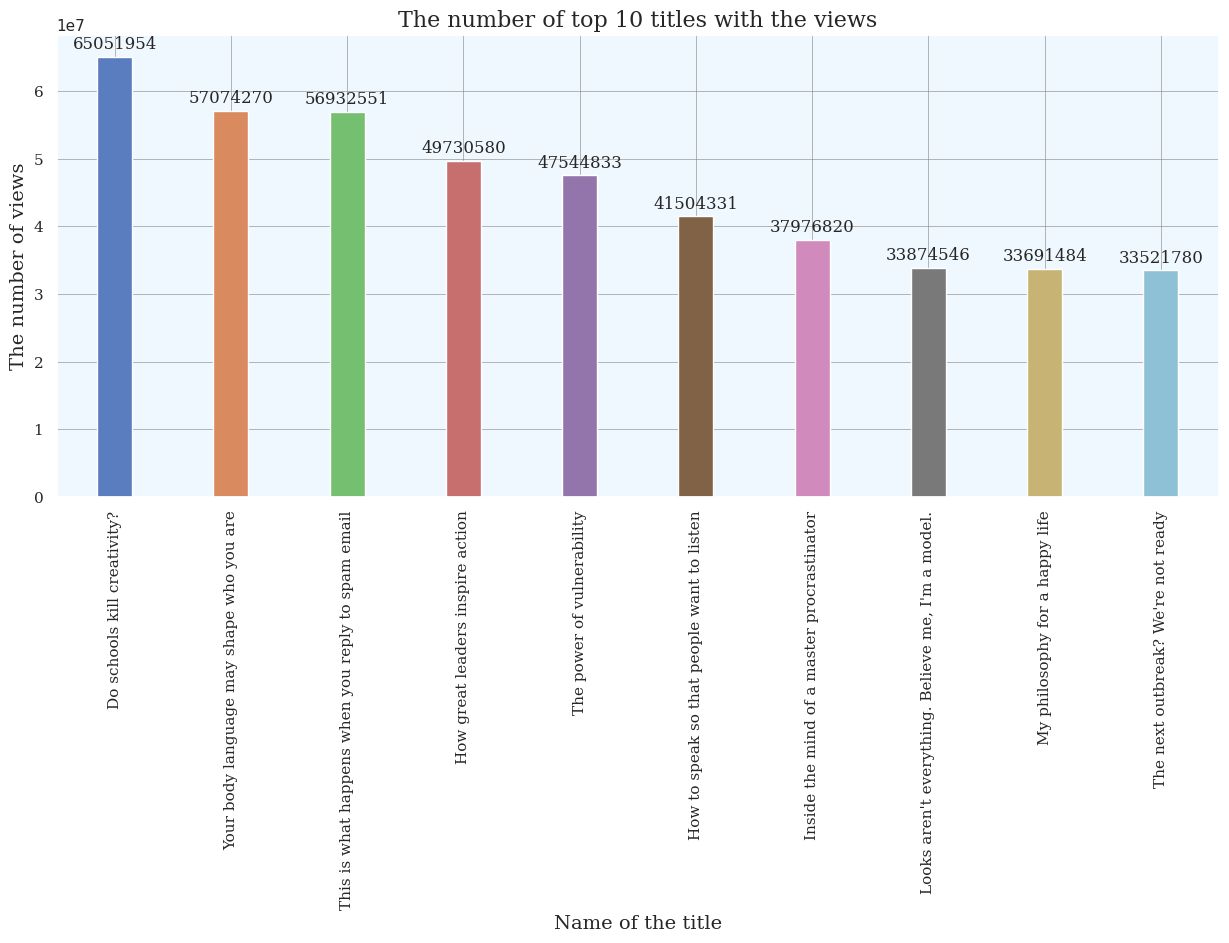

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_comments = df.groupby('title')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(x = 'title', y = 'views', data = total_comments, palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the title", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of top 10 titles with the views', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a simple bar char for a categorical variable and continuous variable.

In [ ]:
total_comments

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


##### 2. What is/are the insight(s) found from the chart?

Inference -

1. **Do school kills creativity?** is topic people liked the most.

2. **Your body language may shape who you are' and 'This is what happens when you reply to spam email'** are the topic people liked the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TED talk should focus on these type of topics for more business.

These are the most effective topics.

#### Chart - 13

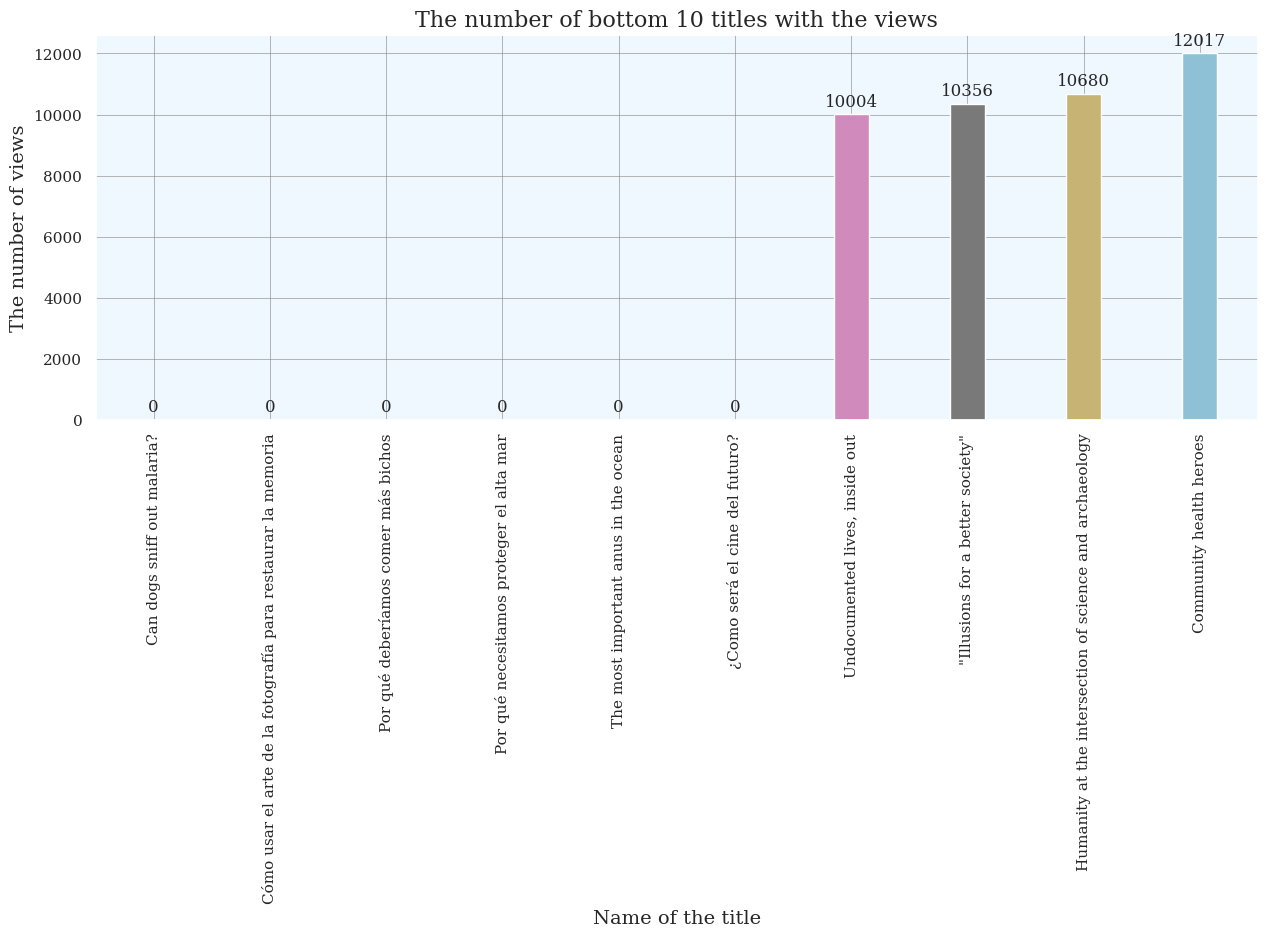

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 5)
colors = sns.color_palette("muted")
less_effective_title = df.groupby('title')['views'].sum().nsmallest(10).reset_index()
ax = sns.barplot(data = less_effective_title, x = 'title', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the title", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of bottom 10 titles with the views', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
less_effective_title

,title,views
0,Can dogs sniff out malaria?,0
1,Cómo usar el arte de la fotografía para restau...,0
2,Por qué deberíamos comer más bichos,0
3,Por qué necesitamos proteger el alta mar,0
4,The most important anus in the ocean,0
5,¿Como será el cine del futuro?,0
6,"Undocumented lives, inside out",10004
7,"""Illusions for a better society""",10356
8,Humanity at the intersection of science and ar...,10680
9,Community health heroes,12017


##### 1. Why did you pick the specific chart?

I picked a simple bar char for a categorical variable and continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Inference -

1. These are the least effective topic in ted talk history.

2. We found moslty are of non english language it means english language is most effcetive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For increasing the business of TED talk they should focus of non-english content because it is less effective.

#### Chart - 14 - Correlation Heatmap

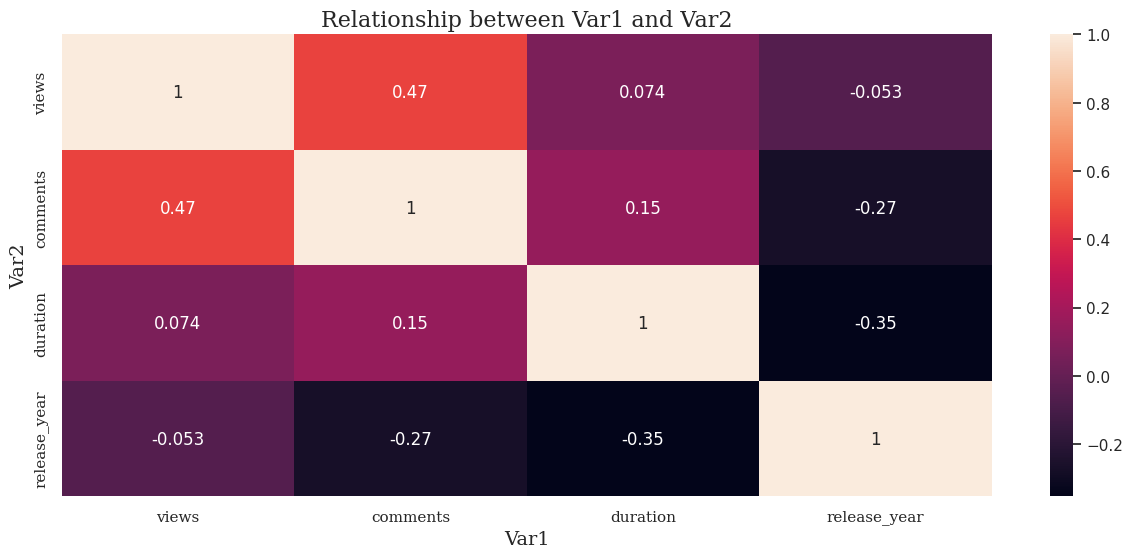

In [ ]:
# Correlation Heatmap representation
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(), annot = True)
plt.xlabel("Var1", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Var2', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Relationship between Var1 and Var2', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked heatmap() which used to the correlation between all features in matrix format.

##### 2. What is/are the insight(s) found from the chart?

Inference -

Comments and views are highly correlated to each other. It means, if one variable will increase, another also increase.

#### Chart - 15

**Pair Plot -** It is a function in the seaborn library in Python that is used to create a matrix of scatter plots to visualize the relationship between multiple variables in a dataset.

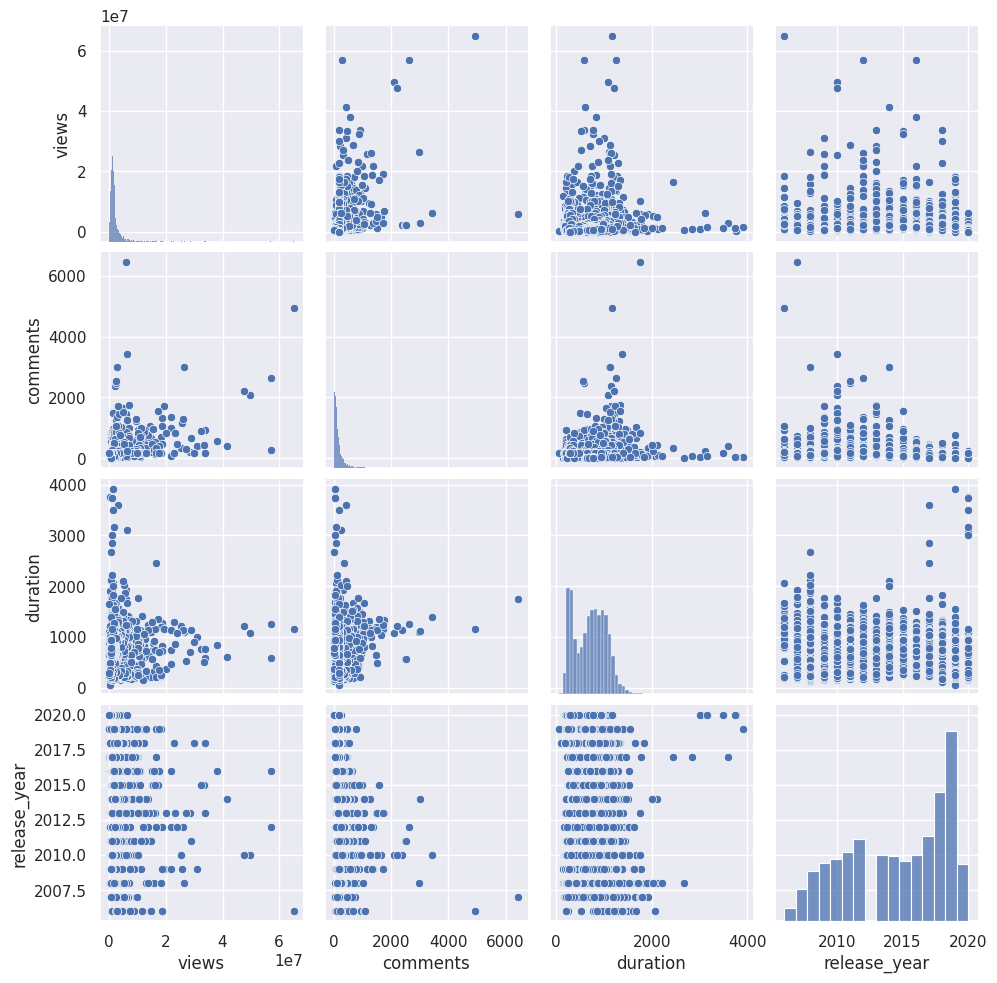

In [ ]:
# Pair plot representation
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot is a function in the seaborn library in Python that is used to create a matrix of scatter plots to visualize the relationship between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Inference -

We can see that how data is scattered to each other.

## **5. Feature Engineering & Data Pre-processing**

### 1. Handle Missing Values

In [ ]:
# Handling missing values & missing value imputation
df.isnull().sum().reset_index()

,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. We have already get rid of missing values in EDA part.


2. We had missing values in five columns.


3. Columns which have less than 5 missing values we replaced with most frequent values.

4. In some columns we used fillna forumula.

5. In numerical colums we replaced missing values with mean of column.

6. These are some ways which I used in removing null values.

### 2. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
# Manipulate features to minimize feature correlation and create new features, create a new feature average views by speaker
mean_encoding = df.groupby('speaker_1')['views'].mean().to_dict()
df['avg_views_by_speaker'] = df['speaker_1'].map(mean_encoding)

In [ ]:
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis = 1)
for index, row in df.iterrows():
    occup_list = list(row['occupations'].values())[0][0]
    df.loc[index, 'occupation'] = str(occup_list)

In [ ]:
# Create a new feature average views by events
mean_encoding_event = df.groupby('event')['views'].mean().to_dict()
df['avg_views_by_event'] = df['event'].map(mean_encoding_event)

# Create new features total language
df['total_lang'] = df.apply(lambda x: len(x['available_lang']), axis = 1)

# Create new features number of topics
df['no_of_topics'] = df.apply(lambda x: len(x['topics']), axis = 1)

# Create new features age of video
df['video_age'] = 2022 - df['release_year']

In [ ]:
# Select your features wisely to avoid overfitting, check all the columns
df.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'views',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'release_day', 'release_month',
       'release_year', 'avg_views_by_speaker', 'occupation',
       'avg_views_by_event', 'total_lang', 'no_of_topics', 'video_age'],
      dtype='object')

In [ ]:
# Drop all unwanted columns
df.drop(columns = ['title', 'all_speakers', 'recorded_date', 'release_year', 'topics', 'available_lang', 'event', 'speaker_1', 'url', 'transcript', 'description', 'native_lang', 'occupations', 'occupation', 'published_date', 'related_talks'], inplace = True, axis = 1)


In [ ]:
# Show the top 5 rows of the remaining columns
df.head()

,views,comments,duration,release_day,release_month,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age
0,3523392,272.0,977,Tuesday,June,2.190599e+06,3.876291e+06,270,134,16
1,14501685,628.0,1190,Tuesday,June,3.987156e+06,3.876291e+06,303,138,16
2,1920832,124.0,1286,Tuesday,June,2.156190e+06,3.876291e+06,165,123,16
3,2664069,219.0,1116,Tuesday,June,1.979411e+06,3.876291e+06,219,116,16
4,65051954,4931.0,1164,Tuesday,June,2.812684e+07,3.876291e+06,387,84,16


##### What all feature selection methods have you used  and why?

1. We just create some features by normal python function.

2. Drop some unwanted features.

3. We will do some features selection after removing of outliers.

#### 3. **Outlier -** It is a data-item/object that deviates significantly from the rest of the (so-called normal) objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. It is defined as being any point of data that lies over 1.5 IQRs (Inter Quartile Range) below the first quartile (Q1) or above the third quartile (Q3) in a data set. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [ ]:
# Show the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   views                 4005 non-null   int64  
 1   comments              4005 non-null   float64
 2   duration              4005 non-null   int64  
 3   release_day           4005 non-null   object 
 4   release_month         4005 non-null   object 
 5   avg_views_by_speaker  4005 non-null   float64
 6   avg_views_by_event    4005 non-null   float64
 7   total_lang            4005 non-null   int64  
 8   no_of_topics          4005 non-null   int64  
 9   video_age             4005 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 313.0+ KB


**Box Plot -** A Box Plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

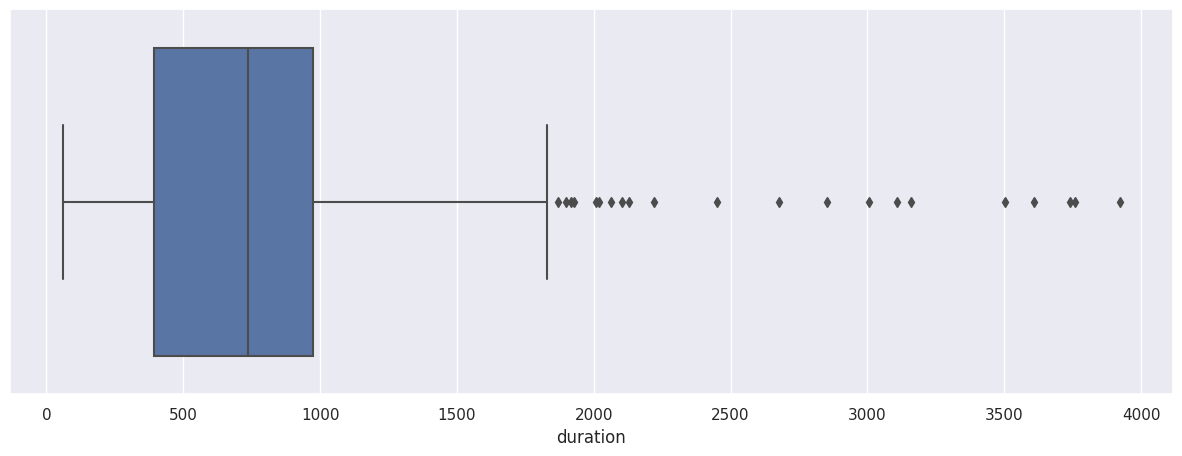

In [ ]:
# Box plot representation
sns.boxplot(data = df, x = 'duration')
plt.show()

In [ ]:
# Handle outliers & Outlier treatment, we have some outliers in each features
Q1 = df.quantile(0.25) # Q1 is first quartile (Lower Quartile Part)
Q3 = df.quantile(0.75) # Q3 is third quartile (Upper Quartile Part)
IQR = Q3 - Q1 # IQR is Inter Quartile Range = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR
((df < outlier1) | (df > outlier2)).sum()

avg_views_by_event      156
avg_views_by_speaker    373
comments                361
duration                 21
no_of_topics            143
release_day               0
release_month             0
total_lang              143
video_age                 0
views                   393
dtype: int64

In [ ]:
# Replace outliers with 25 percentile and 75 percentile
for i in ['avg_views_by_event', 'avg_views_by_speaker', 'comments', 'duration', 'no_of_topics', 'total_lang', 'views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df[i] = np.where(df[i] < (Q1 - 1.5*IQR), (Q1 - 1.5*IQR), np.where(df[i] > (Q3 + 1.5*IQR), (Q3 + 1.5*IQR), df[i]))

In [ ]:
# Remove the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR
((df < outlier1) | (df > outlier2)).sum()

avg_views_by_event      0
avg_views_by_speaker    0
comments                0
duration                0
no_of_topics            0
release_day             0
release_month           0
total_lang              0
video_age               0
views                   0
dtype: int64

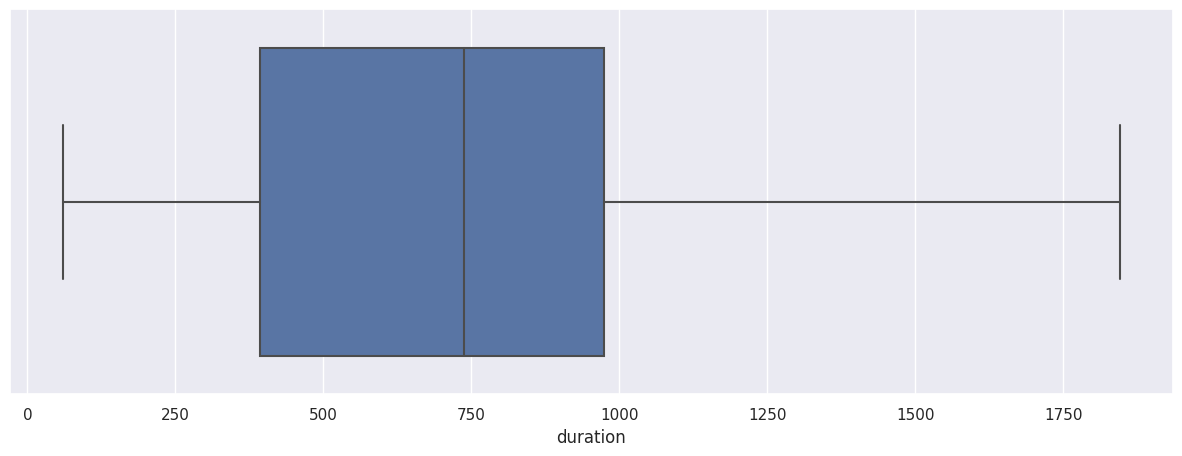

In [ ]:
# Boxplot for the same column, we figure out that there are outliers that need to be remove from duration columns
sns.boxplot(data = df, x = 'duration')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Box plot is one of best method of finding the outliers in a particular features.
The outliers which are less than 25 percentile, we replaced it with 25 percentile value. The outliers which are more than 75 percentile, we replaced it with 25 percentile value.

### 4. Categorical Encoding

In [ ]:
# Separate dependent and independent variable
x = df.drop(columns = 'views')
y = df['views']

In [ ]:
# Encode your categorical columns
x = pd.get_dummies(x)
x.head(2)

,comments,duration,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,272.0,977.0,2190599.25,3.778944e+06,270.0,134.0,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,336.0,1190.0,3987156.10,3.778944e+06,294.0,138.0,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. pd.get_dummies() is a function in the pandas library in Python that is used to convert categorical variables into dummy/indicator variables. This process is also known as **one-hot encoding**.

2. In One-hot encoding, a categorical variable is transformed into a binary matrix where each column represents a category and each row represents an observation. Each cell in the matrix is filled with a binary value of 1 or 0 indicating the presence or absence of a particular category in that observation.

### 5. Feature  Selection

In [ ]:
# Select features wisely to avoid overfitting
f_scores = f_regression(x, y) # The F-Score method is a filter feature selection method that looks at the relationship between each descriptive
f_scores[1]

array([9.90841321e-159, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
       5.81214882e-185, 4.71158966e-002, 3.94142602e-001, 2.51061953e-012,
       1.43491232e-001, 3.85368618e-005, 2.73265521e-004, 3.98310726e-002,
       2.13786984e-001, 9.42649939e-001, 3.53875418e-002, 4.66867525e-001,
       7.41463988e-002, 3.39945041e-001, 5.74106856e-002, 2.06942978e-001,
       4.02649944e-001, 5.32863676e-004, 6.73443607e-002, 7.15013746e-002,
       9.72823723e-003, 2.07117470e-001])

**P Value -** It is the level of marginal significance within a statistical hypothesis test, representing the probability of the occurrence
of a given event. A large P value implies that sample scores are more aligned or similar to the population score. It is as simple as that.

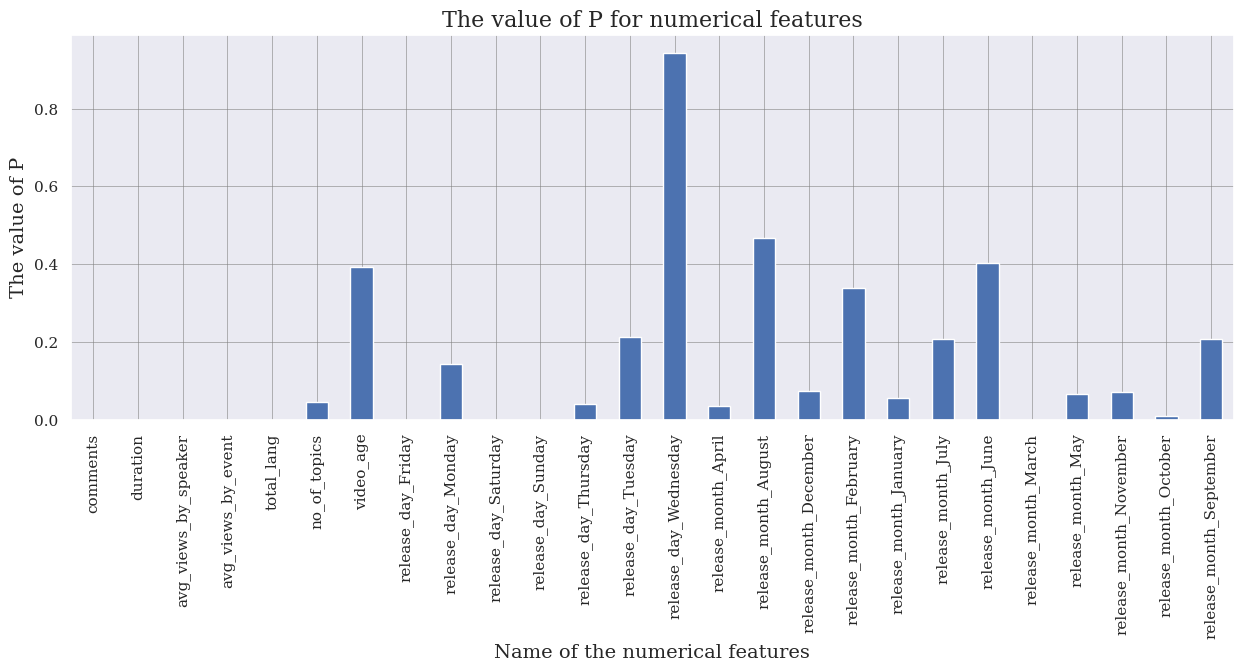

In [ ]:
# Graph representation
plt.rcParams['figure.figsize'] = (15, 5)
p_values = pd.Series(f_scores[1], index = x.columns)
p_values.plot(kind = 'bar')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the numerical features", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The value of P', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The value of P for numerical features', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Select p_value less than 0.005
selected_features = np.where(p_values<0.005)[0]
x = x.iloc[0:, selected_features]

**VIF -** It is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

In [ ]:
# Get VIF for best feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.912068
1,duration,4.136869
2,avg_views_by_speaker,4.621960
3,avg_views_by_event,9.040717
4,total_lang,10.769324
5,release_day_Friday,1.278824
6,release_day_Saturday,1.022116
7,release_day_Sunday,1.031887
8,release_month_March,1.124586


In [ ]:
# Remove total_lang due to high multicollinearity
x.drop('total_lang', axis = 1, inplace = True)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.434986
1,duration,4.008254
2,avg_views_by_speaker,4.381047
3,avg_views_by_event,6.079637
4,release_day_Friday,1.262692
5,release_day_Saturday,1.019789
6,release_day_Sunday,1.030452
7,release_month_March,1.124260






##### What all feature selection methods have you used  and why?

**Feature_selection -** The function returns the F-value and p-value of the linear regression test for each feature in the dataset, which can be used to select the features with the highest F-value and lowest p-value.

VIF is a statistical measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when there is a high correlation between independent variables (also called predictor variables or features) in a regression model.

In [ ]:
print(x.columns)

Index(['comments', 'duration', 'avg_views_by_speaker', 'avg_views_by_event',
       'release_day_Friday', 'release_day_Saturday', 'release_day_Sunday',
       'release_month_March'],
      dtype='object')





##### Which all features you found important and why?

These are some features which we can use in creating a model. We removed multicollinear features and with feature_selection, we found P value.

### 6. **Data Splitting -** It is the act of partitioning available data into 2 portions, usually for cross-validatory purposes. One portion of the data is used to develop a predictive model and the other to evaluate the model's performance.

In [ ]:
# Split our data to train and test. Choose Splitting ratio wisely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [ ]:
# Size of train data
x_train.shape

(2803, 8)

In [ ]:
# Size of test data
x_test.shape

(1202, 8)

##### What data splitting ratio have you used and why?

I took **30%** of data as test data because it will be helpful for creating a best mode.If your dataset is small, you may want to use a larger test size to ensure that the test set is representative of the overall population.

## **6. ML Model Implementation**

#### **1. Linear Regression -** It shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.









In [ ]:
# Implement linear regression
reg = LinearRegression().fit(x_train, y_train)

# Fit the algorithm for linear regression
reg.fit(x_train, y_train)

# Predict the linear regression
y_pred = reg.predict(x_test)

#### Explain the Linear Regression performance by using Evaluation Metric Score Chart


In [ ]:
# Display Evaluation Metric Score Chart for linear regression
Mean_Absolute_Error_Value_of_Linear_Regression = mean_absolute_error(y_test, y_pred) # By using mean_absolute_error() function
print("Mean Absolute Error Value of Linear Regression:", Mean_Absolute_Error_Value_of_Linear_Regression)

Mean_Squared_Error_Value_of_Linear_Regression = mean_squared_error(y_test, y_pred) # By using mean_squared_error() function
print("Mean Squared Error Value of Linear Regression:", Mean_Squared_Error_Value_of_Linear_Regression)

Root_Mean_Square_Error_Value_of_Linear_Regression = np.sqrt(Mean_Squared_Error_Value_of_Linear_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Linear Regression:", Root_Mean_Square_Error_Value_of_Linear_Regression)

R_Squared_Value_of_Linear_Regression = r2_score(y_test, y_pred) # By using r2_score() function
print("R Squared Value of Linear Regression:", R_Squared_Value_of_Linear_Regression)

# Adjusted R Squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1))
Adjusted_R_Squared_Value_of_Linear_Regression = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Linear Regression:", Adjusted_R_Squared_Value_of_Linear_Regression)

Mean Absolute Error Value of Linear Regression: 260752.21899696472
Mean Squared Error Value of Linear Regression: 234841173869.58383
Root Mean Square Error Value of Linear Regression: 484604.1414077926
R Squared Value of Linear Regression: 0.7959370600323038
Adjusted R Squared Value of Linear Regression: 0.7945686580878432


##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

The Evaluation Metrics, used for Linear Regression -

**1. Mean Absolute Error Value -** It is calculated as the average of the absolute differences between the predicted values and the true values.

**2. Mean Squared Error Value -** It is calculated as the average of the squared differences between the predicted values and the true values.

**3. Root Mean Square Error Value -** It is calculated as the average of the root of squared differences between the predicted values and the true values.

**4. R Squared Value -** It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

**5. Adjusted R Squared Value -** It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

In [ ]:
# Display the values of Dataframe_of_Linear_Regression by using pd.DataFrame for linear regression
Dataframe_of_Linear_Regression = pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])
print(Dataframe_of_Linear_Regression)

         actual          pred
0     1559970.0  1.526645e+06
1     1524453.0  1.384209e+06
2      779329.0  7.369715e+05
3     4004739.0  2.504141e+06
4     4000351.0  3.640626e+06
...         ...           ...
1197  1146861.0  1.012874e+06
1198  4009671.5  3.787180e+06
1199  1601998.0  1.510542e+06
1200  1724019.0  1.820843e+06
1201  1753602.0  1.891026e+06

[1202 rows x 2 columns]


#### 2. **Cross-Validation & Hyperparameter Tuning -** It is used when we need to compare the efficiancy of various hyperparameter settings throughout the tuning process. The model is trained and tested for each possible hyperparameter setting, and the results are summarized over k iterations to provide an overall performance score.

#### **2. Lasso Regression -** It is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

In [ ]:
# Implement lasso regression
lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100, 110, 120, 150, 160, 170, 200]}

# Fit the algorithm for lasso regression
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)
lasso = Lasso(alpha = 200, max_iter =  3000)
lasso.fit(x_train,y_train)

# Predict the lasso regression
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
# Display Evaluation Metric Score Chart for lasso regression
Mean_Absolute_Error_Value_of_Lasso_Regression = mean_absolute_error(y_test,y_pred_lasso) # By using mean_absolute_error() function
print("Mean Absolute Error Value of Lasso Regression:", Mean_Absolute_Error_Value_of_Lasso_Regression)

Mean_Squared_Error_Value_of_Lasso_Regression = mean_squared_error(y_test, y_pred_lasso) # By using mean_squared_error() function
print("Mean Squared Error Value of Lasso Regression:", Mean_Squared_Error_Value_of_Lasso_Regression)

Root_Mean_Square_Error_Value_of_Lasso_Regression = np.sqrt(Mean_Squared_Error_Value_of_Lasso_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Lasso Regression:", Root_Mean_Square_Error_Value_of_Lasso_Regression)

R_Squared_Value_of_Lasso_Regression = r2_score(y_test, y_pred_lasso) # By using r2_score() function
print("R Squared Value of Lasso Regression:", R_Squared_Value_of_Lasso_Regression)

# Adjusted R-Squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1))
Adjusted_R_Squared_Value_of_Lasso_Regression = 1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Lasso Regression:", Adjusted_R_Squared_Value_of_Lasso_Regression)

Mean Absolute Error Value of Lasso Regression: 260508.8263454157
Mean Squared Error Value of Lasso Regression: 234761921364.77924
Root Mean Square Error Value of Lasso Regression: 484522.36415337864
R Squared Value of Lasso Regression: 0.796005925720819
Adjusted R Squared Value of Lasso Regression: 0.7946379855747725


##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

On comparing linear regression and lasso regression, we found that lasso regression giving us a slightly better result. So, we can consider lasso regression as better model.

In [ ]:
# Display the values of Dataframe_of_Lasso_Regression by using pd.DataFrame for lasso regression
Dataframe_of_Lasso_Regression = pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])
Dataframe_of_Lasso_Regression

,actual,pred
0,1559970.0,1.525363e+06
1,1524453.0,1.384283e+06
2,779329.0,7.364857e+05
3,4004739.0,2.504300e+06
4,4000351.0,3.641089e+06
...,...,...
1197,1146861.0,1.012843e+06
1198,4009671.5,3.787086e+06
1199,1601998.0,1.510228e+06
1200,1724019.0,1.820059e+06


#### **3. Ridge Regression -** It is a model tuning method that is used to analyse any data that suffers from multicollinearity. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [ ]:
# Implement ridge regression
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

# Fit the algorithm for ridge regression
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x_train, y_train)

# Predict the ridge regression
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
# Display Evaluation Metric Score Chart for ridge regression
Mean_Absolute_Error_Value_of_Ridge_Regression = mean_absolute_error(y_test, y_pred_ridge) # By using mean_absolute_error() function
print("Mean Absolute Error Value of Ridge Regression:", Mean_Absolute_Error_Value_of_Ridge_Regression)

Mean_Squared_Error_Value_of_Ridge_Regression = mean_squared_error(y_test, y_pred_ridge) # By using mean_squared_error() function
print("Mean Squared Error Value of Ridge Regression:", Mean_Squared_Error_Value_of_Ridge_Regression)

Root_Mean_Square_Error_Value_of_Ridge_Regression = np.sqrt(Mean_Squared_Error_Value_of_Ridge_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Ridge Regression:", Root_Mean_Square_Error_Value_of_Ridge_Regression)

R_Squared_Value_of_Ridge_Regression = r2_score(y_test, y_pred_ridge) # By using r2_score() function
print("R Squared Value of Ridge Regression:", R_Squared_Value_of_Ridge_Regression)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
Adjusted_R_Squared_Value_of_Ridge_Regression = 1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Ridge Regression:", Adjusted_R_Squared_Value_of_Ridge_Regression)


Mean Absolute Error Value of Ridge Regression: 259469.30334901332
Mean Squared Error Value of Ridge Regression: 234348424577.73996
Root Mean Square Error Value of Ridge Regression: 484095.4705197519
R Squared Value of Ridge Regression: 0.7963652297075946
Adjusted R Squared Value of Ridge Regression: 0.7949996989763798


##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

**1. R Squared Value of Linear Rgeression = 79.59%**

**2. R Squared Value of Lasso Rgeression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

Here, Ridge Regression is giving us the better result than others.

In [ ]:
# Display the values of Dataframe_of_Ridge_Regression by using pd.DataFrame for ridge regression
Dataframe_of_Ridge_Regression = pd.DataFrame(zip(y_test, y_pred_ridge), columns = ['actual', 'pred'])
Dataframe_of_Ridge_Regression

,actual,pred
0,1559970.0,1.520068e+06
1,1524453.0,1.383895e+06
2,779329.0,7.336266e+05
3,4004739.0,2.504055e+06
4,4000351.0,3.642087e+06
...,...,...
1197,1146861.0,1.012079e+06
1198,4009671.5,3.785574e+06
1199,1601998.0,1.510772e+06
1200,1724019.0,1.815798e+06


#### **4. Elastic Net Regression -** It uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regression of statistical models.

In [ ]:
# Implement elastic net regression
elastic= ElasticNet()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100, 110, 120, 150], 'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv = 5)

# Fit the algorithm for elastic net regression
elastic_regressor.fit(x_train, y_train)

# Predict the elastic net regression
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
# Display Evaluation Metric Score Chart for eleastic net regression
Mean_Absolute_Error_Value_of_Elastic_Net_Regression = mean_absolute_error(y_test, y_pred_elastic)
print("Mean Absolute Error Value of Elastic Net Regression:", Mean_Absolute_Error_Value_of_Elastic_Net_Regression)  # By using mean_absolute_error() function

Mean_Squared_Error_Value_of_Elastic_Net_Regression = mean_squared_error(y_test, y_pred_elastic)  # By using mean_squared_error() function
print("Mean Squared Error Value of Elastic Net Regression:", Mean_Squared_Error_Value_of_Elastic_Net_Regression)

Root_Mean_Square_Error_Value_of_Elastic_Net_Regression = np.sqrt(Mean_Squared_Error_Value_of_Elastic_Net_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Elastic Net Regression:", Root_Mean_Square_Error_Value_of_Elastic_Net_Regression)

R_Squared_Value_of_Elastic_Net_Regression = r2_score(y_test, y_pred_elastic) # By using r2_score() function
print("R Sqaured Value of Elastic Net Regression:", R_Squared_Value_of_Elastic_Net_Regression)

# Adjusted R-Squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1))
Adjusted_R_Squared_Value_of_Elastic_Net_Regression = 1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Sqaured Value of Elastic Net Regression:", Adjusted_R_Squared_Value_of_Elastic_Net_Regression)

Mean Absolute Error Value of Elastic Net Regression: 259519.8834264935
Mean Squared Error Value of Elastic Net Regression: 234365135511.03714
Root Mean Square Error Value of Elastic Net Regression: 484112.7301683329
R Sqaured Value of Elastic Net Regression: 0.7963507089056329
Adjusted R Sqaured Value of Elastic Net Regression: 0.7949850808010603


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

Here, we can consider Ridge Regression due to same result.

In [ ]:
# Display the values of Dataframe_of_Elastic_Net_Regression by using pd.DataFrame for elastic net regression
Dataframe_of_Elastic_Net_Regression = pd.DataFrame(zip(y_test, y_pred_elastic), columns = ['actual', 'pred'])
Dataframe_of_Elastic_Net_Regression

,actual,pred
0,1559970.0,1.520453e+06
1,1524453.0,1.383874e+06
2,779329.0,7.337249e+05
3,4004739.0,2.504026e+06
4,4000351.0,3.641982e+06
...,...,...
1197,1146861.0,1.012072e+06
1198,4009671.5,3.785585e+06
1199,1601998.0,1.510793e+06
1200,1724019.0,1.815954e+06


##### Which hyperparameter optimization technique have you used and why?

**GridSearch CV -** It is a method in sklearn library, used to tune hyperparameters of a model by exhaustively trying every combination of provided parameter values. It takes an estimator (model), a set of hyperparameters to search over, and a scoring method as input and returns the best combination of parameters that gives the best score as output.

This way GridSearchCV makes the process of tuning the parameters of a model more efficient and less time-consuming.

In [ ]:
# # Show the Evaluation Metric Score Chart for all the above models
model_data = pd.DataFrame()
model_data['Name of the Model'] = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression']
model_data['Mean Absolute Error Value'] = [Mean_Absolute_Error_Value_of_Linear_Regression, Mean_Absolute_Error_Value_of_Lasso_Regression, Mean_Absolute_Error_Value_of_Ridge_Regression,
                     Mean_Absolute_Error_Value_of_Elastic_Net_Regression]
model_data['Mean Squared Error Value'] = [Mean_Squared_Error_Value_of_Linear_Regression, Mean_Squared_Error_Value_of_Lasso_Regression, Mean_Squared_Error_Value_of_Ridge_Regression,
                     Mean_Squared_Error_Value_of_Elastic_Net_Regression]
model_data['Root Mean Square Error Value'] = [Root_Mean_Square_Error_Value_of_Linear_Regression, Root_Mean_Square_Error_Value_of_Lasso_Regression, Root_Mean_Square_Error_Value_of_Ridge_Regression,
                     Root_Mean_Square_Error_Value_of_Elastic_Net_Regression]
model_data['R Squared Value'] = [R_Squared_Value_of_Linear_Regression, R_Squared_Value_of_Lasso_Regression, R_Squared_Value_of_Ridge_Regression,
                     R_Squared_Value_of_Elastic_Net_Regression]
model_data['Adjusted R Sqaured Value'] = [Adjusted_R_Squared_Value_of_Linear_Regression, Adjusted_R_Squared_Value_of_Lasso_Regression, Adjusted_R_Squared_Value_of_Ridge_Regression,
                     Adjusted_R_Squared_Value_of_Elastic_Net_Regression]
model_data

,Name of the Model,Mean Absolute Error Value,Mean Squared Error Value,Root Mean Square Error Value,R Squared Value,Adjusted R Sqaured Value
0,Linear Regression,260752.218997,2.348412e+11,484604.141408,0.795937,0.794569
1,Lasso Regression,260508.826345,2.347619e+11,484522.364153,0.796006,0.794638
2,Ridge Regression,259469.303349,2.343484e+11,484095.470520,0.796365,0.795000
3,Elastic Net Regression,259519.883426,2.343651e+11,484112.730168,0.796351,0.794985


##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

We did not see major improvement but yeah, we improved our model 0.1%.This could useful for large amount of data.

#### **5. Decision Tree Regression -** It is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes, and leaf nodes.

In [ ]:
# Implement decision tree regression
decision_tree = DecisionTreeRegressor(max_depth = 5)

# Fit the algorithm for decision tree regression
decision_tree.fit(x_train, y_train)

# Predict the decision tree regression
y_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)

#### Explain the Decision Tree Regression performance by using Evaluation Metric Score Chart

In [ ]:
# Display Evaluation Metric Score Chart for decision tree regression
Mean_Absolute_Error_Value_of_Decision_Tree_Regression = mean_absolute_error(y_test, y_pred_dt) # By using mean_absolute_error() function
print("Mean Absolute Error Value of Decision Tree Regression:", Mean_Absolute_Error_Value_of_Decision_Tree_Regression)

Mean_Squared_Error_Value_of_Decision_Tree_Regression = mean_squared_error(y_test, y_pred_dt) # By using mean_squared_error() function
print("Mean Squared Error Value of Decision Tree Regression:", Mean_Squared_Error_Value_of_Decision_Tree_Regression)

Root_Mean_Square_Error_Value_of_Decision_Tree_Regression = np.sqrt(Mean_Squared_Error_Value_of_Decision_Tree_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Decision Tree Regression:", Root_Mean_Square_Error_Value_of_Decision_Tree_Regression)

R_Squared_Value_of_Decision_Tree_Regression = r2_score(y_test, y_pred_dt) # By using r2_score() function
print("R Squared Value of Decision Tree Regression:", R_Squared_Value_of_Decision_Tree_Regression)

# Adjusted R-Squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1))
Adjusted_R_Squared_Value_of_Decision_Tree_Regression = 1-(1-r2_score((y_test), (y_pred_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Decision Tree Regression:", Adjusted_R_Squared_Value_of_Decision_Tree_Regression)

Mean Absolute Error Value of Decision Tree Regression: 245548.46073019848
Mean Squared Error Value of Decision Tree Regression: 234765470882.49698
Root Mean Square Error Value of Decision Tree Regression: 484526.02704343654
R Squared Value of Decision Tree Regression: 0.7960028414021323
Adjusted R Squared Value of Decision Tree Regression: 0.7946348805733117


1. The model we used is **Decision Tree Rgeression**.

2. Fit the algorithm and predict it.

##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

**5. R Squared Value of Decision Tree Regression = 79.47%**

Here, we can not consider Decision Tree Regression due to bad result.

In [ ]:
# Display the values of Dataframe_of_Decision_Tree_Regression by using pd.DataFrame for decision treee regression
Dataframe_of_Decision_Tree_Regression = pd.DataFrame(zip(y_test, y_pred_dt), columns = ['actual', 'pred'])
Dataframe_of_Decision_Tree_Regression

,actual,pred
0,1559970.0,1.672460e+06
1,1524453.0,1.672460e+06
2,779329.0,7.813492e+05
3,4004739.0,2.929380e+06
4,4000351.0,3.559352e+06
...,...,...
1197,1146861.0,1.230361e+06
1198,4009671.5,3.923037e+06
1199,1601998.0,1.672460e+06
1200,1724019.0,1.672460e+06


#### **6. Random Forest Regression -** It is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. It's ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [ ]:
# Implement random forest regression
random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 8)

# Fit the algorithm for random forest regression
random_forest.fit(x_train, y_train)

# Predict the random forest regression
y_pred_rf = random_forest.predict(x_test)

#### Explain the Random Forest Regression performance by using Evaluation Metric Score Chart.

In [ ]:
# Display Evaluation Metric Score Chart for random forest regression
Mean_Absolute_Error_Value_of_Random_Forest_Regression = mean_absolute_error(y_test, y_pred_rf) # By using mean_absolute_error() function
print("Mean Absolute Error Value of Random Forest Regression:", Mean_Absolute_Error_Value_of_Random_Forest_Regression)

Mean_Squared_Error_Value_of_Random_Forest_Regression = mean_squared_error(y_test, y_pred_rf) # By using mean_squared_error() function
print("Mean Squared Error Value of Random Forest Regression:", Mean_Squared_Error_Value_of_Random_Forest_Regression)

Root_Mean_Square_Error_Value_of_Random_Forest_Regression = np.sqrt(Mean_Squared_Error_Value_of_Random_Forest_Regression) # By using np.sqrt() function
print("Root Mean Square Error Value of Random Forest Regression:", Root_Mean_Square_Error_Value_of_Random_Forest_Regression)

R_Squared_Value_of_Random_Forest_Regression = r2_score(y_test, y_pred_rf) # By using r2_score() function
print("R Squared Value of Random Forest Regression:", R_Squared_Value_of_Random_Forest_Regression)

Adjusted_R_Squared_Value_of_Random_Forest_Regression = 1-(1-r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Random Forest Regression: ", Adjusted_R_Squared_Value_of_Random_Forest_Regression)

Mean Absolute Error Value of Random Forest Regression: 214974.8046054717
Mean Squared Error Value of Random Forest Regression: 212884420587.13895
Root Mean Square Error Value of Random Forest Regression: 461393.99712950207
R Squared Value of Random Forest Regression: 0.8150161659366597
Adjusted R Squared Value of Random Forest Regression:  0.8137757043503171


In [ ]:
# Display the values of Dataframe_of_Random_Forest_Regression by using pd.DataFrame for random forest regression
Dataframe_of_Random_Forest_Regression = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])
Dataframe_of_Random_Forest_Regression

,actual,pred
0,1559970.0,1.601157e+06
1,1524453.0,1.586118e+06
2,779329.0,7.481768e+05
3,4004739.0,2.744271e+06
4,4000351.0,3.371192e+06
...,...,...
1197,1146861.0,1.184558e+06
1198,4009671.5,3.944491e+06
1199,1601998.0,1.640002e+06
1200,1724019.0,1.717613e+06


##### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

**5. R Squared Value of Decision Tree Regression = 79.47%**

**6. R Squared Value of Random Forest Regression = 81.65%**

Yes. Here we can see major improvemnet in **Random Forest Regression** with 81.65%. So, we can consider Random Forest Regression as the Best model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Adjusted R Squared Value -** It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables. It is giving the better result with Random Forest Regression.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

So, for final prediction, we chosen **Random Forest Regression** as the Best model.

It's giving us the best result compare to other models

**1. Mean Absolute Error Value of Random Forest Regression: 214478.48**

**2. Mean Squared Error Value of Random Forest Regression: 211160445918.40**

**3. Root Mean Square Error Value of Random Forest Regression: 459521.97**

**4. R Squared Value of Random Forest Regression: 81.65%**

**5. Adjusted R Squared Value of Random Forest Regression:  81.52%**



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest Regression is known for their interpretability, as it is relatively easy to understand how the model is making predictions. One way to understand feature importance in Random Forest is by using the feature_importances_attribute of the model, which returns the importance of each feature in the dataset.

# **Conclusion**

#### After loading the dataset, cleaning the data, performing EDA, dealing with Null Values, Outliers and after feature selection following Models are built.

In [ ]:
# Show the Evaluation Metric Score Chart for all the models
model_data = pd.DataFrame()
model_data['Name of the Model'] = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression']
model_data['Mean Absolute Error Value'] = [Mean_Absolute_Error_Value_of_Linear_Regression, Mean_Absolute_Error_Value_of_Lasso_Regression, Mean_Absolute_Error_Value_of_Ridge_Regression,
                     Mean_Absolute_Error_Value_of_Elastic_Net_Regression, Mean_Absolute_Error_Value_of_Decision_Tree_Regression, Mean_Absolute_Error_Value_of_Random_Forest_Regression]

model_data['Mean Squared Error Value'] = [Mean_Squared_Error_Value_of_Linear_Regression, Mean_Squared_Error_Value_of_Lasso_Regression, Mean_Squared_Error_Value_of_Ridge_Regression,
                     Mean_Squared_Error_Value_of_Elastic_Net_Regression, Mean_Squared_Error_Value_of_Decision_Tree_Regression, Mean_Squared_Error_Value_of_Random_Forest_Regression]

model_data['Root Mean Square Error Value'] = [Root_Mean_Square_Error_Value_of_Linear_Regression, Root_Mean_Square_Error_Value_of_Lasso_Regression, Root_Mean_Square_Error_Value_of_Ridge_Regression,
                     Root_Mean_Square_Error_Value_of_Elastic_Net_Regression, Root_Mean_Square_Error_Value_of_Decision_Tree_Regression, Root_Mean_Square_Error_Value_of_Random_Forest_Regression]

model_data['R Squared Value'] = [R_Squared_Value_of_Linear_Regression, R_Squared_Value_of_Lasso_Regression, R_Squared_Value_of_Ridge_Regression,
                     R_Squared_Value_of_Elastic_Net_Regression, R_Squared_Value_of_Decision_Tree_Regression, R_Squared_Value_of_Random_Forest_Regression]

model_data['Adjusted R Sqaured Value'] = [Adjusted_R_Squared_Value_of_Linear_Regression, Adjusted_R_Squared_Value_of_Lasso_Regression, Adjusted_R_Squared_Value_of_Ridge_Regression,
                     Adjusted_R_Squared_Value_of_Elastic_Net_Regression, Adjusted_R_Squared_Value_of_Decision_Tree_Regression, Adjusted_R_Squared_Value_of_Random_Forest_Regression]
model_data

,Name of the Model,Mean Absolute Error Value,Mean Squared Error Value,Root Mean Square Error Value,R Squared Value,Adjusted R Sqaured Value
0,Linear Regression,260752.218997,2.348412e+11,484604.141408,0.795937,0.794569
1,Lasso Regression,260508.826345,2.347619e+11,484522.364153,0.796006,0.794638
2,Ridge Regression,259469.303349,2.343484e+11,484095.470520,0.796365,0.795000
3,Elastic Net Regression,259519.883426,2.343651e+11,484112.730168,0.796351,0.794985
4,Decision Tree Regression,245548.460730,2.347655e+11,484526.027043,0.796003,0.794635
5,Random Forest Regression,214974.804605,2.128844e+11,461393.997130,0.815016,0.813776


#### Here, we can easily see comparision Evaluation Metric Score Chart for all the models. Random Forest Regression giving us the best result.

#### After comparing, mean squared error values, it is evident that random forest regression is the Best performer.

### **Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**